# Arabica Coffee Exploration

## Introduction

### Background

In the past few years, I have become more interested in coffee. I have thought about how Q-grade affect the price of coffee. However, a more foundational questions deals with how a coffee will score first before it is priced. A Q-grader evaluates the coffee during a process called cupping. The cupping process allows the grader to compare different coffees together. They brew each coffee with the same amount of coffee and water. Specialty Coffee Assocation (SCA) provides the [protocols](https://sca.coffee/research/protocols-best-practices) for cupping an evaluating coffee. Coffees are graded on "Fragrance/Aroma, Flavor, Aftertaste, Acidity, Body, Balance, Uniformity, Clean Cup, Sweetness, Defects, and Overall" (Source: SCA). The graders assign a number between 6-10 using quarter point incriments.  

### Data Source
This data comes from James LeDoux [GitHub](https://github.com/jldbc/coffee-quality-database/tree/master/data) repositiary. He scrapped the data from Coffee Quality Institue [database](https://database.coffeeinstitute.org/) in January 2018. He has both the scrapped data and the clean data. I have choosen to use the clean data.

## Data Scoping

I want to discover the connection between cupping score and alititude and also look at variety and cupping score. Here is the order of questions to discover or connect.

1. Compare `Total.Cup.Points` with `variety`

2. Compare `Total.Cup.Points` with `altitude_mean_meters`

3. Determine if `altitude_mean_meters` and `variety` effect `Total.Cup.Points`.

### Import Python Modules

To start the analysis, I am going to load Pandas, Matplotlib, and Seaborn

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### Loading the Data

In [2]:
coffee_df = pd.read_csv("arabica_data_cleaned.csv")
print(coffee_df.shape)

(1311, 44)


Since there are 44 different columns, the next step will reduce the dataframe to the columns that will be required.

In [3]:
coffee_edit_df = coffee_df[["Species", "Variety", "Total.Cup.Points", "altitude_mean_meters", "unit_of_measurement"]].copy()
print(coffee_edit_df.shape)

(1311, 5)


In [4]:
print(coffee_edit_df.describe(include="all"))

        Species  Variety  Total.Cup.Points  altitude_mean_meters  \
count      1311     1110       1311.000000           1084.000000   
unique        1       29               NaN                   NaN   
top     Arabica  Caturra               NaN                   NaN   
freq       1311      256               NaN                   NaN   
mean        NaN      NaN         82.115927           1784.196379   
std         NaN      NaN          3.515761           8767.016913   
min         NaN      NaN          0.000000              1.000000   
25%         NaN      NaN         81.170000           1100.000000   
50%         NaN      NaN         82.500000           1310.640000   
75%         NaN      NaN         83.670000           1600.000000   
max         NaN      NaN         90.580000         190164.000000   

       unit_of_measurement  
count                 1311  
unique                   2  
top                      m  
freq                  1129  
mean                   NaN  
std      

In [5]:
print(coffee_edit_df.isna().sum())

Species                   0
Variety                 201
Total.Cup.Points          0
altitude_mean_meters    227
unit_of_measurement       0
dtype: int64


## Evaluate Data

### Comparing Varities to Cupping Score

#### Examining Data

In order to anwser our first question, we will copy `coffee_edit_df` to only keep `Variety` and `Total.Cup.Points`. There are some varieties than have a couple of points so all varieties with less than 10 entries were removed from df. Next, we group all vareties with their average cupping scores. Finally, the we boxplot these varieties and ordered from highest average cup score to least.

In [6]:
grade_variety = coffee_edit_df[['Variety', 'Total.Cup.Points']].copy()
grade_variety.Variety = grade_variety.Variety.fillna('Unknown')
grade_variety['count_variety'] = grade_variety.groupby(["Variety"]).transform('nunique')
grade_df = grade_variety[grade_variety.count_variety >= 10]
grouped_grade_variety = grade_df.loc[:,['Variety', 'Total.Cup.Points']].groupby('Variety').median().sort_values(by='Total.Cup.Points', ascending=False)
print(grade_variety)

      Variety  Total.Cup.Points  count_variety
0     Unknown             90.58             96
1       Other             89.92             66
2     Bourbon             89.75             85
3     Unknown             89.00             96
4       Other             88.83             66
...       ...               ...            ...
1306  Bourbon             68.33             85
1307   Typica             67.92             96
1308  Caturra             63.08             83
1309   Catuai             59.83             44
1310  Caturra              0.00             83

[1311 rows x 3 columns]


In [7]:
print(grade_df['Variety'][grade_variety.count_variety >= 40].unique())

['Unknown' 'Other' 'Bourbon' 'Caturra' 'Catuai' 'Typica']


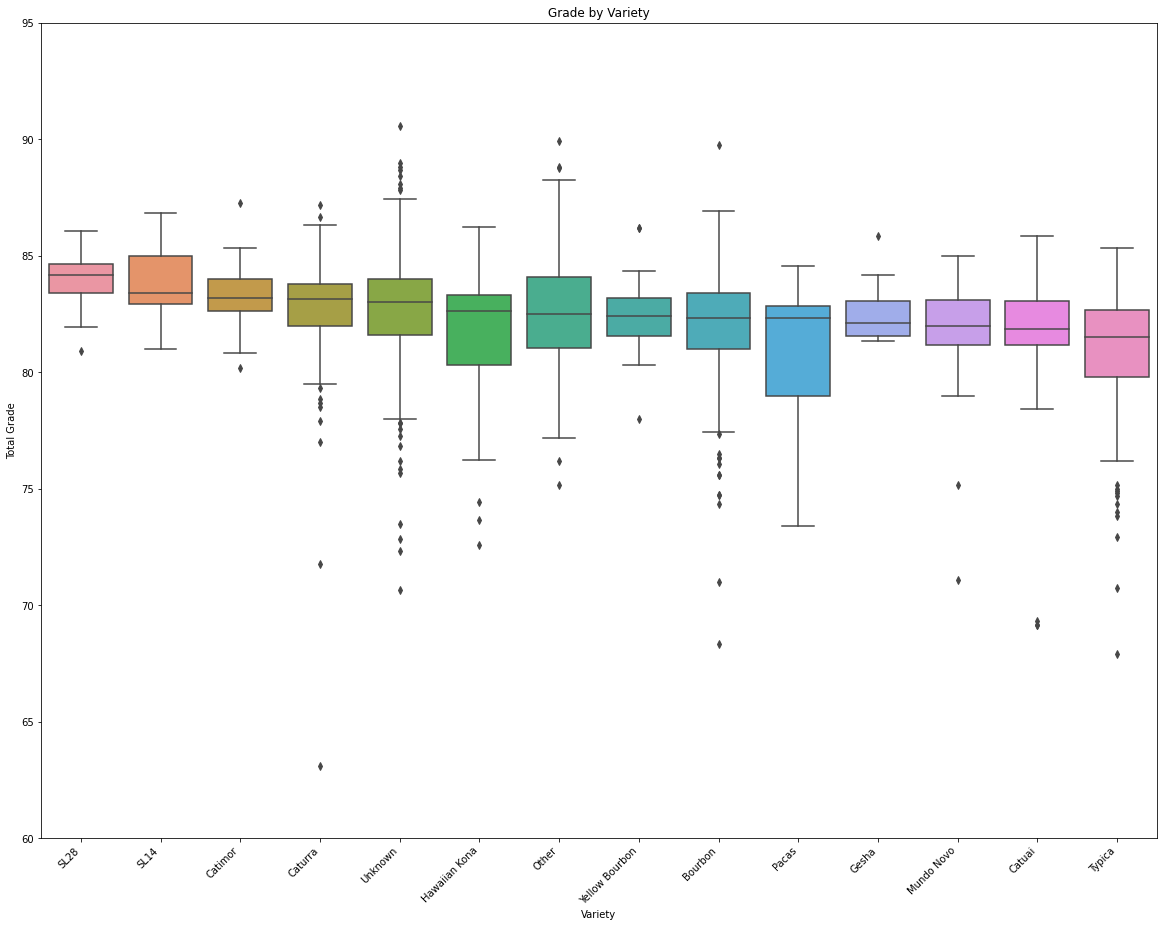

In [8]:
plt.figure(figsize=[20,15], facecolor='white')
sns.boxplot(x='Variety', y='Total.Cup.Points',data=grade_df, order=grouped_grade_variety.index)
plt.title('Grade by Variety')
plt.xlabel('Variety')
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Total Grade')
plt.ylim(60, 95)
plt.savefig('grade_by_variety.png')

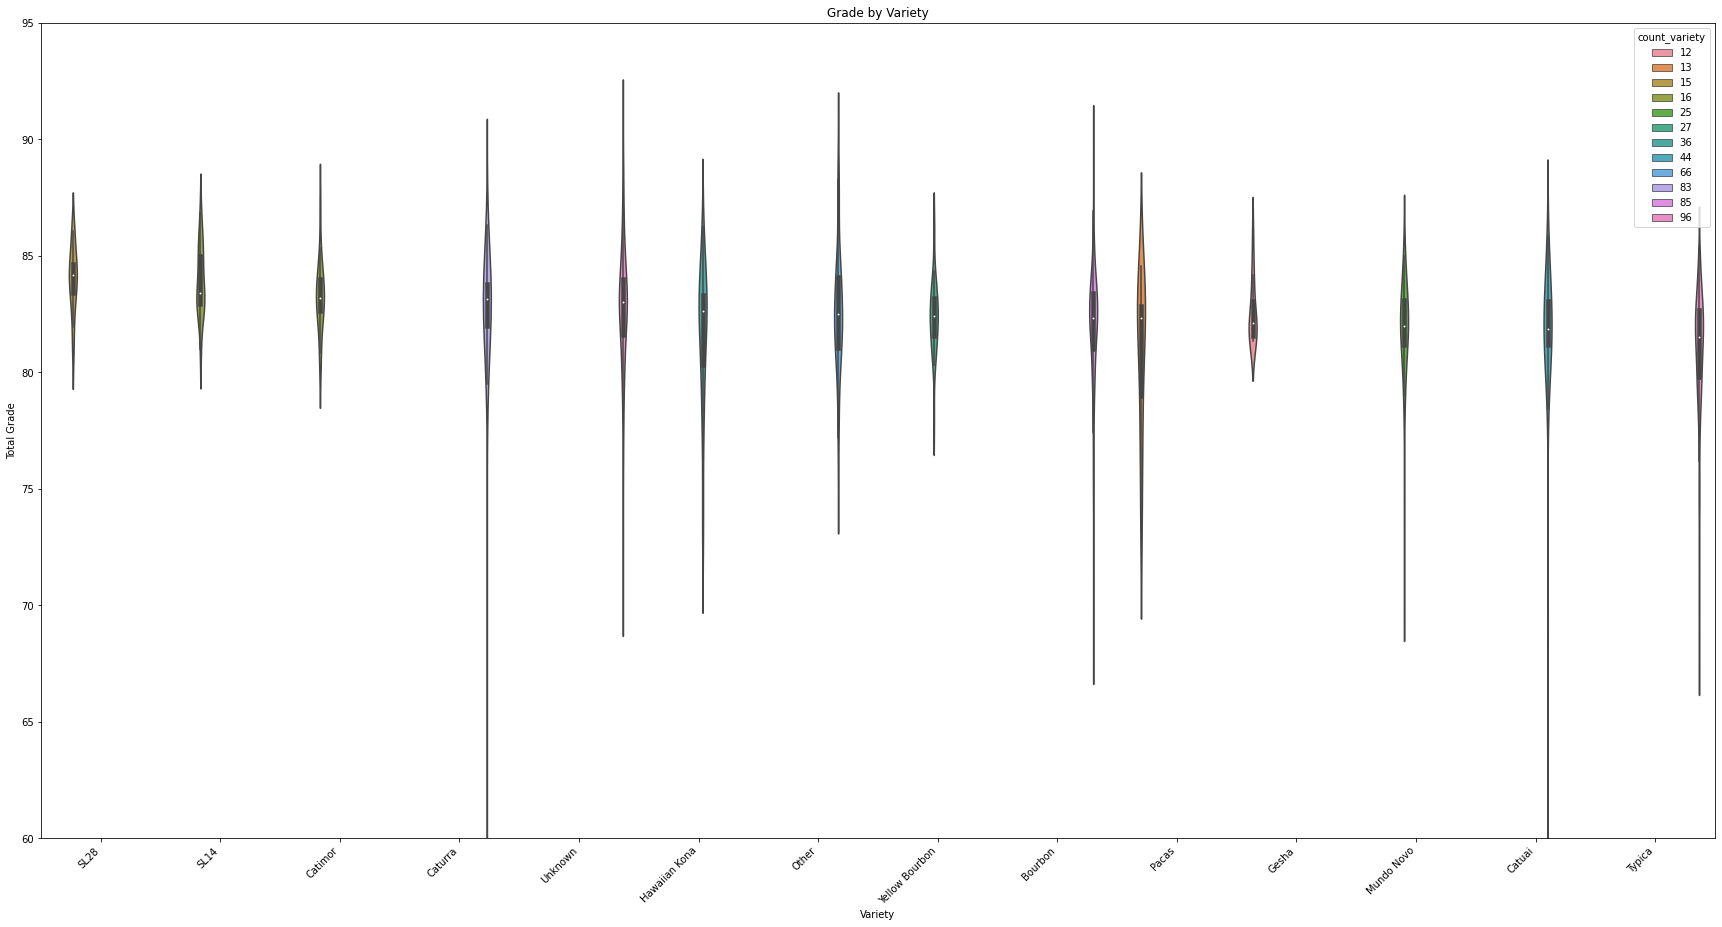

In [9]:
plt.figure(figsize=[30,15], facecolor='white')
sns.violinplot(x='Variety', y='Total.Cup.Points',data=grade_df, hue='count_variety', order=grouped_grade_variety.index)
plt.title('Grade by Variety')
plt.xlabel('Variety')
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Total Grade')
plt.ylim(60, 95)
plt.savefig('grade_by_variety_violin.png')

#### Observations

The box plot shows that all varieties have a similar average cup total. Gesha is known for being one of the best coffees yet its cupping score does not reflect the high qualtity many give it. The top 3 cupping scores are coffees found in east Africa, specificly Kenya, Malawi, and Zimbabwe. Caturra breaks the chain as a South American Coffee varietal.  

(60.0, 95.0)

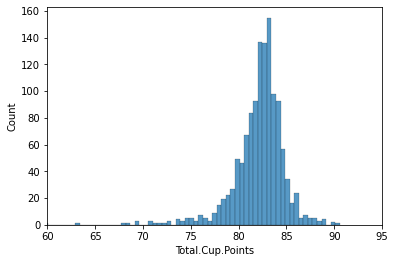

In [10]:
sns.histplot(grade_df['Total.Cup.Points'])
plt.xlim(60, 95)

### Comparing Altitude to Total Cup Score

#### Examining the Data




In [11]:
altitude_df = coffee_edit_df[['altitude_mean_meters', 'Total.Cup.Points']].copy()
altitude_df.altitude_mean_meters = altitude_df.altitude_mean_meters.fillna(0).astype('float64')
altitude_edit_df = altitude_df[altitude_df['altitude_mean_meters'].between(500,2500)]
print(altitude_edit_df)

      altitude_mean_meters  Total.Cup.Points
0                  2075.00             90.58
1                  2075.00             89.92
2                  1700.00             89.75
3                  2000.00             89.00
4                  2075.00             88.83
...                    ...               ...
1305               1450.00             69.17
1306                900.00             68.33
1308               1100.00             63.08
1309               1417.32             59.83
1310               1400.00              0.00

[1006 rows x 2 columns]


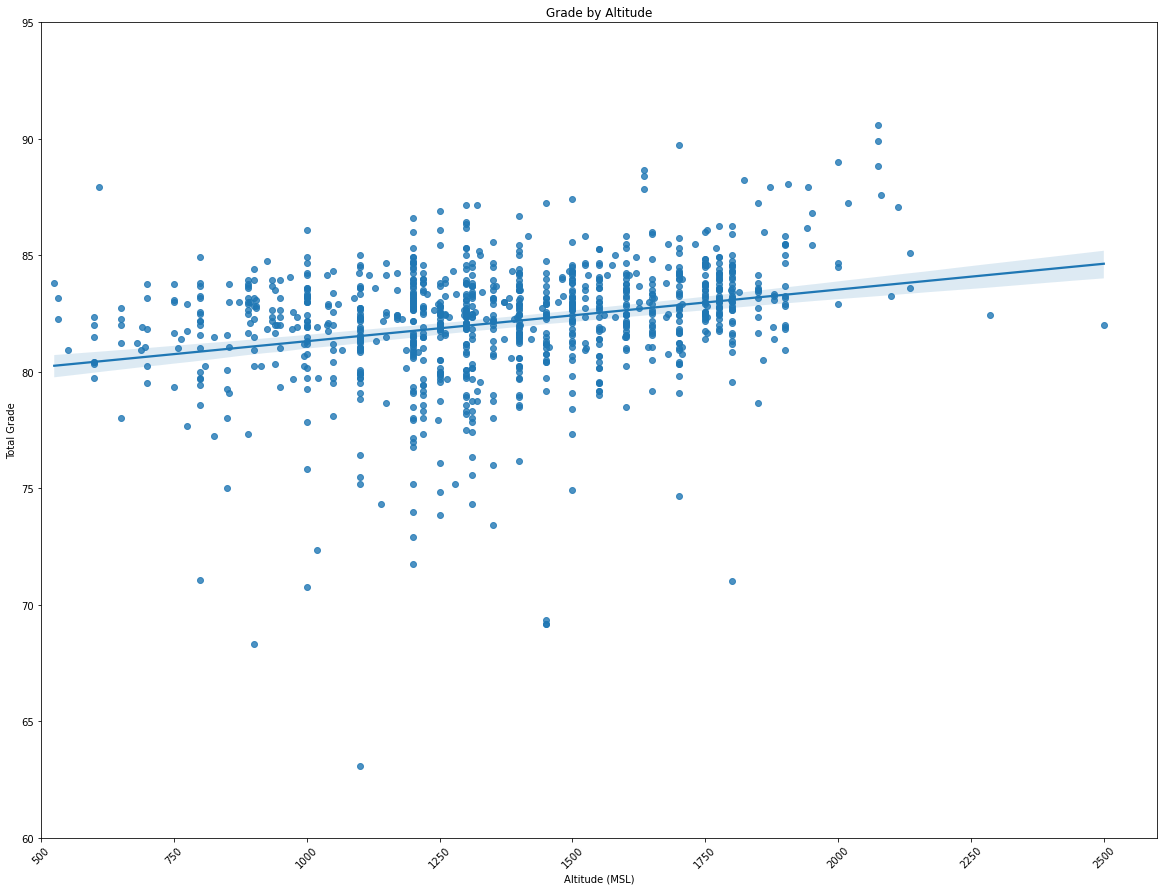

In [12]:
plt.figure(figsize=[20,15], facecolor='white')
sns.regplot(x='altitude_mean_meters',y='Total.Cup.Points', data=altitude_edit_df)
plt.title('Grade by Altitude')
plt.xlabel('Altitude (MSL)')
plt.xticks(rotation = 45)
plt.ylabel('Total Grade')
plt.ylim(60, 95)
plt.xlim(500, 2600)
plt.savefig('grade_by_altitude.png')

In [13]:
grade_variety_alt = coffee_edit_df[['Variety', 'altitude_mean_meters', 'Total.Cup.Points']].copy()
grade_variety_alt.Variety = grade_variety_alt.Variety.fillna('Unknown')
grade_variety_alt.altitude_mean_meters = grade_variety_alt.altitude_mean_meters.fillna(0).astype('float64')
grade_variety_alt = grade_variety_alt[grade_variety_alt['altitude_mean_meters'].between(500,2500)]
print(grade_variety_alt)

      Variety  altitude_mean_meters  Total.Cup.Points
0     Unknown               2075.00             90.58
1       Other               2075.00             89.92
2     Bourbon               1700.00             89.75
3     Unknown               2000.00             89.00
4       Other               2075.00             88.83
...       ...                   ...               ...
1305   Catuai               1450.00             69.17
1306  Bourbon                900.00             68.33
1308  Caturra               1100.00             63.08
1309   Catuai               1417.32             59.83
1310  Caturra               1400.00              0.00

[1006 rows x 3 columns]


In [14]:
grade_variety_df = grade_variety_alt[['Variety', 'Total.Cup.Points']].copy()
grade_alt_df = grade_variety_alt[['altitude_mean_meters', 'Total.Cup.Points']].copy()

In [15]:
bourbon_cup_score = grade_variety['Total.Cup.Points'][grade_variety.Variety == 'Bourbon']
typica_cup_score = grade_variety['Total.Cup.Points'][grade_variety.Variety == 'Typica']
caturra_cup_score = grade_variety['Total.Cup.Points'][grade_variety.Variety == 'Caturra']
catuai_cup_score = grade_variety['Total.Cup.Points'][grade_variety.Variety == 'Catuai']


(60.0, 95.0)

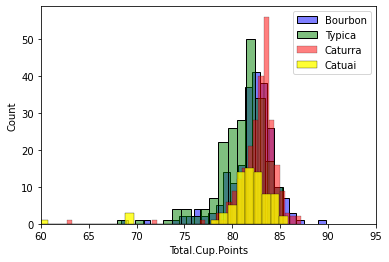

In [16]:
sns.histplot(bourbon_cup_score,color='blue', alpha=.5, label='Bourbon')
sns.histplot(typica_cup_score,color='green', alpha=.5, label='Typica')
sns.histplot(caturra_cup_score,color='red', alpha=.5, label='Caturra')
sns.histplot(catuai_cup_score,color='yellow', alpha=.8, label='Catuai')
plt.legend()
plt.xlim(60, 95)

In [17]:
ratio_1 = np.std(bourbon_cup_score)/np.std(typica_cup_score)
ratio_2 = np.std(bourbon_cup_score)/np.std(caturra_cup_score)
ratio_3 = np.std(bourbon_cup_score)/np.std(catuai_cup_score)
ratio_4 = np.std(typica_cup_score)/np.std(caturra_cup_score)
ratio_5 = np.std(typica_cup_score)/np.std(catuai_cup_score)
ratio_6 = np.std(caturra_cup_score)/np.std(catuai_cup_score)
print(ratio_1)
print(ratio_2)
print(ratio_3)
print(ratio_4)
print(ratio_5)
print(ratio_6)

0.9800674635417158
0.45383897838274245
0.6521203027868124
0.4630691205100139
0.6653830751917982
1.4368979612783512


In [18]:
fstat, pval = f_oneway(bourbon_cup_score, typica_cup_score)
print(pval)

0.00018070578528463015


Spliting Altitude of varital into bins

In [19]:
top_score = grade_variety_alt[(grade_variety_alt.Variety == 'Bourbon')|(grade_variety_alt.Variety == 'Typica')|(grade_variety_alt.Variety == 'Caturra')|(grade_variety_alt.Variety == 'Catuai')].copy().reset_index()
print(top_score)

     index  Variety  altitude_mean_meters  Total.Cup.Points
0        2  Bourbon               1700.00             89.75
1       21  Caturra               1300.00             87.17
2       25  Bourbon               1250.00             86.92
3       28  Caturra               1400.00             86.67
4       32  Bourbon               1300.00             86.42
..     ...      ...                   ...               ...
670   1305   Catuai               1450.00             69.17
671   1306  Bourbon                900.00             68.33
672   1308  Caturra               1100.00             63.08
673   1309   Catuai               1417.32             59.83
674   1310  Caturra               1400.00              0.00

[675 rows x 4 columns]


In [20]:
top_score['altitude_group'] = pd.qcut(bourbon_alt_score['altitude_mean_meters'],4)
print(top_score)

NameError: name 'bourbon_alt_score' is not defined

In [ ]:
plt.figure(figsize=[20,15], facecolor='white')
sns.violinplot(data=top_score,hue='altitude_group',y='Total.Cup.Points',x='Variety', alpha=.5, cut=0)
